# Dataset source
 Here https://r-data.pmagunia.com/dataset/r-dataset-package-islr-default
 
 On this R-data statistics page, you will find information about the Default data set which pertains to Credit Card Default Data. The Default data set is found in the ISLR R package. You can load the Default data set in R by issuing the following command at the console data("Default"). This will load the data into a variable called Default. If R says the Default data set is not found, you can try installing the package by issuing this command install.packages("ISLR") and then attempt to reload the data. If you need to download R, you can go to the R project website. You can download a CSV (comma separated values) version of the Default R data set. The size of this file is about 433,674 bytes.

# load library

In [1]:
import pandas as pd
from seaborn import pairplot 
from seaborn import boxplot
from seaborn import countplot

import matplotlib.pyplot as plt

plt.style.use('belle2')

In [2]:
#loading dataset
df = pd.read_csv('dataset-63314.csv')
df.head(5)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [3]:
# creating number target variable
codes = {'Yes':0,'No':1}
df['target'] = df['default'].map(codes)
df['isstudent'] = df['student'].map(codes)
df.head(5)

,default,student,balance,income,target,isstudent
0,No,No,729.526495,44361.625074,1,1
1,No,Yes,817.180407,12106.134700,1,0
2,No,No,1073.549164,31767.138947,1,1
3,No,No,529.250605,35704.493935,1,1
4,No,No,785.655883,38463.495879,1,1


# plotting

Source: here (https://towardsdatascience.com/practical-guide-to-data-visualization-83e375b0037)

## Scatter plot

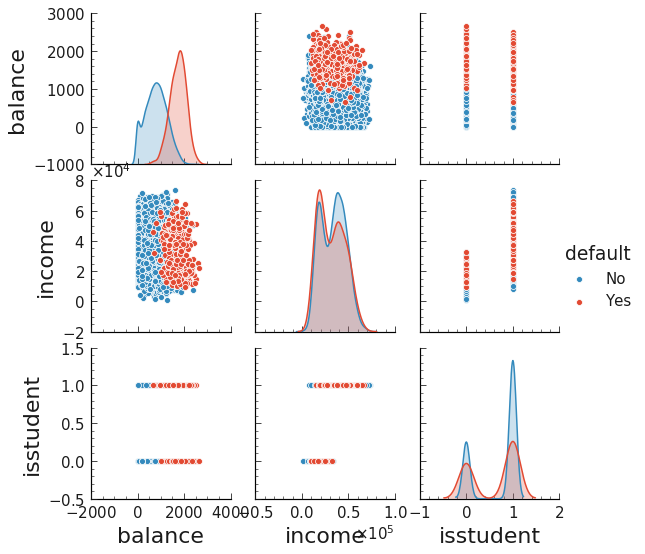

In [206]:
# plotting correlation
pairplot(df.drop(columns = ['target']),hue='default')
plt.show()

In [207]:
df.describe()

,balance,income,target,isstudent
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,835.374886,33516.981876,0.966700,0.705600
std,483.714985,13336.639563,0.179428,0.455795
min,0.000000,771.967729,0.000000,0.000000
25%,481.731105,21340.462903,1.000000,0.000000
50%,823.636973,34552.644802,1.000000,1.000000
75%,1166.308386,43807.729272,1.000000,1.000000
max,2654.322576,73554.233495,1.000000,1.000000


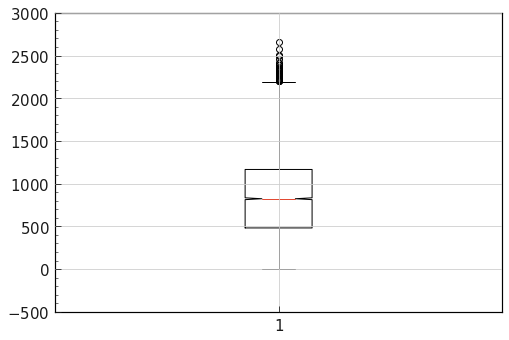

In [208]:
plt.boxplot(df['balance'],#patch_artist = True,
                notch ='True', vert = 1)
plt.grid()
plt.show()

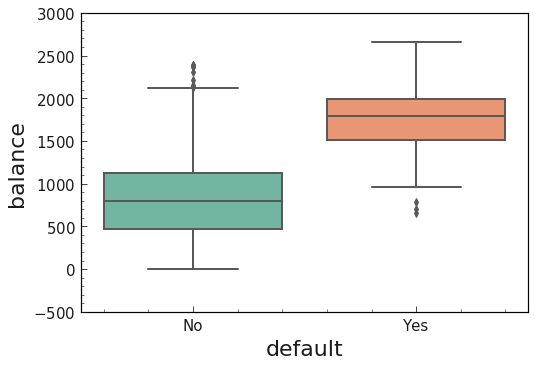

In [209]:
boxplot (x= 'default', y= 'balance', data =df, linewidth=2,palette= 'Set2');

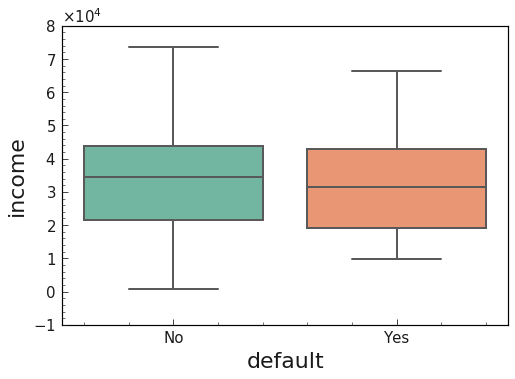

In [210]:
boxplot (x= 'default', y= 'income', data =df, linewidth=2,palette= 'Set2');

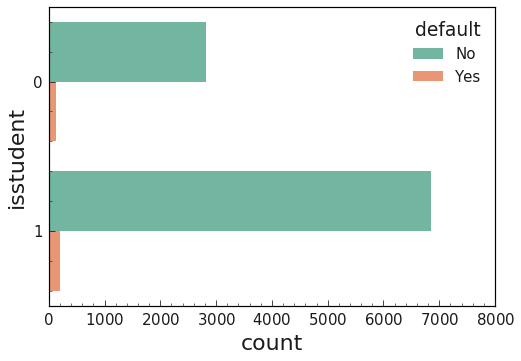

In [211]:
countplot (y= 'isstudent', hue= 'default', data =df, palette= 'Set2');

# Drawing cost function

In [321]:
import numpy as np
import math

def logistic_fun(X,y,theta, debug=False, MSE = False):
    n = X.shape[0]
    X =np.column_stack([np.ones((n,1)),X])# np.hstack((np.ones((n,1)),X.reshape(n,1)
    xth_y = (X.dot(theta))
    
    
    hx = (1+ math.e**(-xth_y))**(-1)
    cost = -1/n * (np.log(hx)*y+(1-y)*np.log(1-hx)).sum()
    
    if MSE:
        hx = (1+ math.e**(-xth_y))**(-1)
        cost = (2*n)**(-1) *((hx-y)**2).sum()
    
    
    
    if debug:
        print('X',X,'\n', 'theta',theta,'\n','X.theta', xth_y, '\n', 'htheta',hx, '\n', 'cost',cost,'\n','y',y)

    return hx, cost

using standardscalar for scaling the feature [link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) 

In [322]:
# taking the balance feature since it has highest impact as seen earlier
X = df['balance'].to_numpy()
y = df['target'].to_numpy()

In [323]:
# use of standard scaler for scaling large numbers
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X.reshape(10000,1))

#print(scaler.mean_,scaler.var_)

X_co = scaler.transform(X.reshape(10000,1)).reshape(10000,)

In [439]:
# checks
theta= np.array([1,0])
htheta,cost = logistic_fun(X_co[172:175],y[172:175],theta,debug=True)

X [[1.         0.27312448]
 [1.         2.83326588]
 [1.         0.87413351]] 
 theta [1 0] 
 X.theta [1. 1. 1.] 
 htheta [0.73105858 0.73105858 0.73105858] 
 cost 0.6465950208515561 
 y [1 0 1]


all right

In [355]:
#y[172:175]

In [356]:
#np. where(y == 0)

## predictor function plot

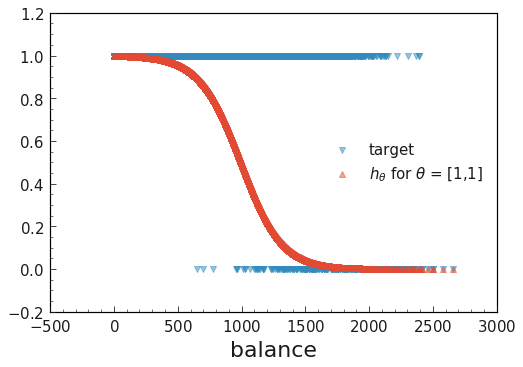

In [434]:
theta= np.array([1,-3])
htheta,cost = logistic_fun(X_co,y,theta)

#plotting htheta
plt.scatter(X, y, marker='v',alpha = 0.5, label='target')
plt.scatter(X, htheta, marker='^',alpha = 0.5, label=r'$h_{\theta}$ for $\theta$ = [1,1]')
plt.xlabel('balance')
plt.legend()
plt.show()

## plotting cost function

$\theta$ is considerd as [1, ...]

In [357]:
thetath = np.arange(-4,4,0.1)
theta1cost = []
for ii in thetath:
    theta= np.array([1,ii])
    theta1cost.append(logistic_fun(X_co,y,theta)[1])

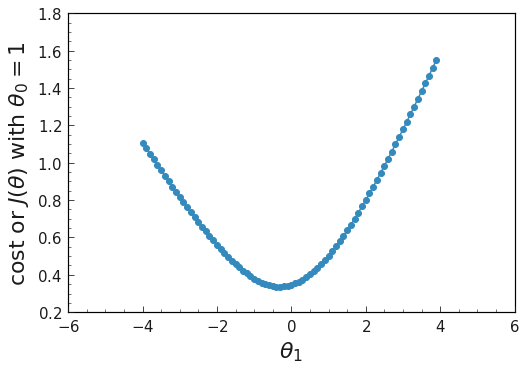

In [358]:
plt.plot(thetath,np.array(theta1cost),marker='o')
plt.xlabel(r'$\theta_{1}$')
plt.ylabel(r'cost or $J(\theta)$ with $\theta_{0}=1$')
plt.show()

# minimizing cost function manually

# inbuild logistic regression function in sklearn

In [419]:
# taking the balance feature since it has highest impact as seen earlier
X = df['balance'].to_numpy()
y = df['target'].to_numpy()

In [420]:
# use of standard scaler for scaling large numbers
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X.reshape(10000,1))
X_co = scaler.transform(X.reshape(10000,1))

In [421]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,penalty='none')
clf.fit(X_co, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [422]:
clf.coef_[0][0]

-2.6597834784668675

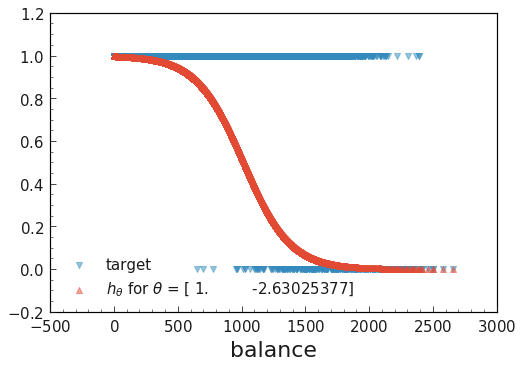

In [333]:
theta= np.array([1,clf.coef_[0][0]])
htheta,cost = logistic_fun(X_co,y,theta)

#plotting htheta
plt.scatter(X, y, marker='v',alpha = 0.5, label='target')
plt.scatter(X, htheta, marker='^',alpha = 0.5, label=r'$h_{\theta}$ for $\theta$ = %s'%theta)
plt.xlabel('balance')
plt.legend()
plt.show()

# Issue

The inbuild function provide the theta1 = -2.6, but visually when I plot cost function I get theta1=0. Which means 
* some mistakes calculating cost, or
* some special treatment while fitting with Logistics regression

below let's see the cost function for [1,0] is less than cost function for [1,-2.6]

In [430]:
theta= np.array([1,0])
logistic_fun(X_co,y,theta)[1]

0.3465616875182227

In [424]:
theta= np.array([1,-2.6])
logistic_fun(X_co,y,theta)[1]

0.7088444264304166

In [435]:
theta= np.array([1,0])
logistic_fun(X_co,y,theta,MSE=True)[1]

0.04385899473263579

In [436]:
theta= np.array([1,-2.6])
logistic_fun(X_co,y,theta,MSE=True)[1]

0.11268706610318063

In [428]:
from sklearn.linear_model.logistic import _logistic_loss
print(_logistic_loss(clf.coef_, X_co, y, 1 / clf.C))

[[1.27068739e+08]]
